<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [4]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [6]:
data = pd.read_csv('./train.csv')

In [7]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [8]:
# YOUR CODE
data.head() #первые 5 строк

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [10]:
np.any(data.isna()) #np.nan нет

False

In [11]:
print(len(cat_cols) + len(num_cols)) #лишних признаков нет, 19 т.к. без учета Churn

19


In [12]:
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

Sex DISTRIBUTION
Male      2655
Female    2627
Name: Sex, dtype: int64

IsSeniorCitizen DISTRIBUTION
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

HasPartner DISTRIBUTION
No     2705
Yes    2577
Name: HasPartner, dtype: int64

HasChild DISTRIBUTION
No     3676
Yes    1606
Name: HasChild, dtype: int64

HasPhoneService DISTRIBUTION
Yes    4761
No      521
Name: HasPhoneService, dtype: int64

HasMultiplePhoneNumbers DISTRIBUTION
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

HasInternetService DISTRIBUTION
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

HasOnlineSecurityService DISTRIBUTION
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

HasOnlineBackup DISTRIBUTION
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dty

In [13]:
for elem in num_cols: #попробуем перевести числовые признаки в float
    try:
        data[elem] = data[elem].astype(float)
    except:
        pass
print(data[num_cols].dtypes) #TotalSpent не перевелось в float, проверим почему

ClientPeriod       float64
MonthlySpending    float64
TotalSpent          object
dtype: object


In [14]:
bad_ind = []
for i in range(data.shape[0]): #посмотрим какие строки не перевелись в float
    try:
        a = float(data.loc[i, 'TotalSpent'])
    except:
        bad_ind.append(i)
data.loc[bad_ind]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0.0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0.0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0.0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0.0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0.0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0.0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0.0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0.0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0.0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


## Проверим формулу:
## TotalSpent = MonthlySpending * ClientPeriod

In [15]:
import warnings
warnings.filterwarnings("ignore")

dfnum = data[num_cols]
dfnum.loc[bad_ind, 'TotalSpent'] = np.nan;
dfnum.drop(bad_ind, inplace=True);
dfnum.loc[:, 'Formula'] = dfnum['ClientPeriod'] * dfnum['MonthlySpending'];
dfnum

,ClientPeriod,MonthlySpending,TotalSpent,Formula
0,55.0,19.50,1026.35,1072.50
1,72.0,25.85,1872.2,1861.20
2,1.0,75.90,75.9,75.90
3,32.0,79.30,2570,2537.60
4,60.0,115.25,6758.45,6915.00
...,...,...,...,...
5277,3.0,30.40,82.15,91.20
5278,50.0,44.45,2188.45,2222.50
5279,1.0,55.05,55.05,55.05
5280,29.0,76.00,2215.25,2204.00


In [16]:
data.at[bad_ind, 'TotalSpent'] = 0 #занулим чтобы перевести все в float
data['TotalSpent'] = data['TotalSpent'].astype(float)
data.loc[bad_ind, 'TotalSpent'] = data.loc[bad_ind, 'MonthlySpending'] / 2

### TotalSpent пропущено у тех клиентов, у кого идет первый месяц оплаты т.к. они еще не заплатили. Заменим их траты на MonthlySpending / 2

In [17]:
data.loc[bad_ind]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0.0,25.75,12.875,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0.0,73.35,36.675,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0.0,19.70,9.850,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0.0,80.85,40.425,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0.0,20.00,10.000,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0.0,61.90,30.950,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0.0,25.35,12.675,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0.0,52.55,26.275,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0.0,56.05,28.025,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

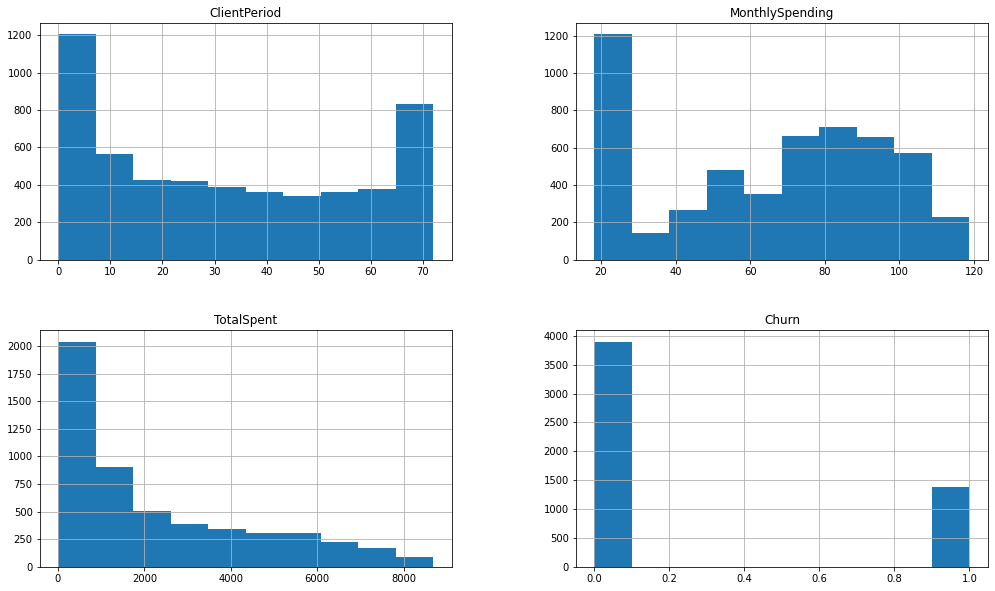

In [18]:
# YOUR CODE
data.hist(column = num_cols + [target_col], figsize=(17, 10))
None

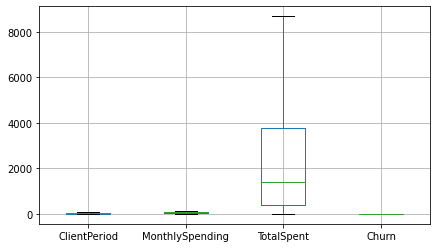

In [19]:
data.boxplot(column = num_cols + [target_col], figsize=(7, 4));

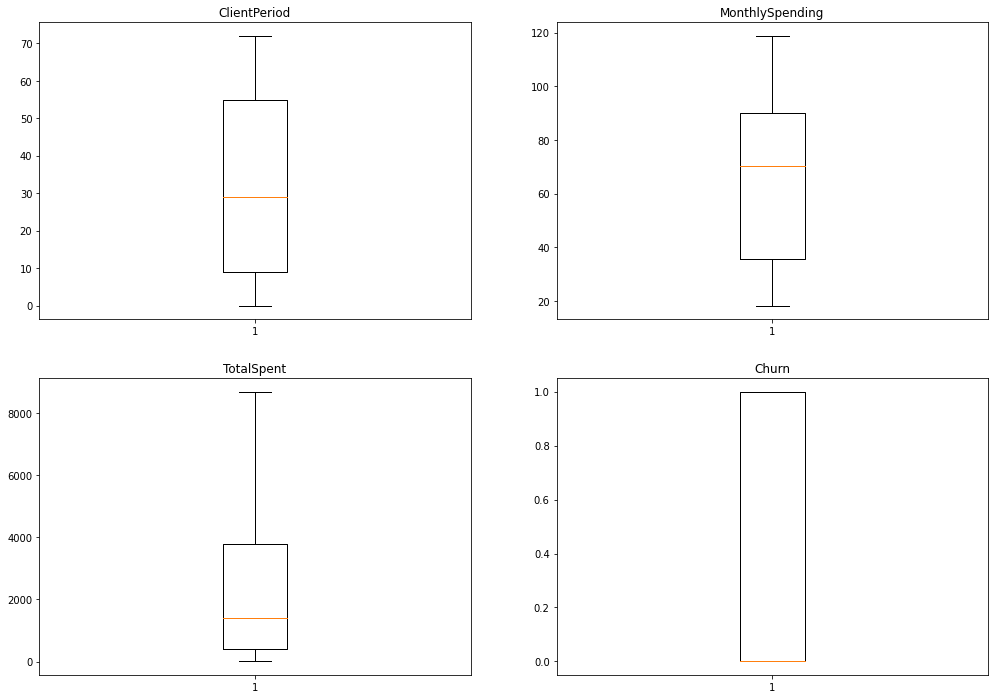

In [20]:
fig = plt.figure(figsize=(17, 12))

for i, col in zip(np.arange(4)+1, num_cols + [target_col]):
    plt.subplot(2, 2, i)
    plt.title(col)
    plt.boxplot(data[col])

In [21]:
print(cat_cols)
print(len(cat_cols))

['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']
16


In [22]:
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].astype(str) #категорилальный признак отображается как число
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].apply(lambda x: 'Yes' if x == '0' else 'No') #преобразование в Yes/No
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55.0,19.50,1026.35,Male,Yes,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72.0,25.85,1872.20,Male,Yes,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1.0,75.90,75.90,Male,Yes,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32.0,79.30,2570.00,Female,No,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60.0,115.25,6758.45,Female,Yes,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


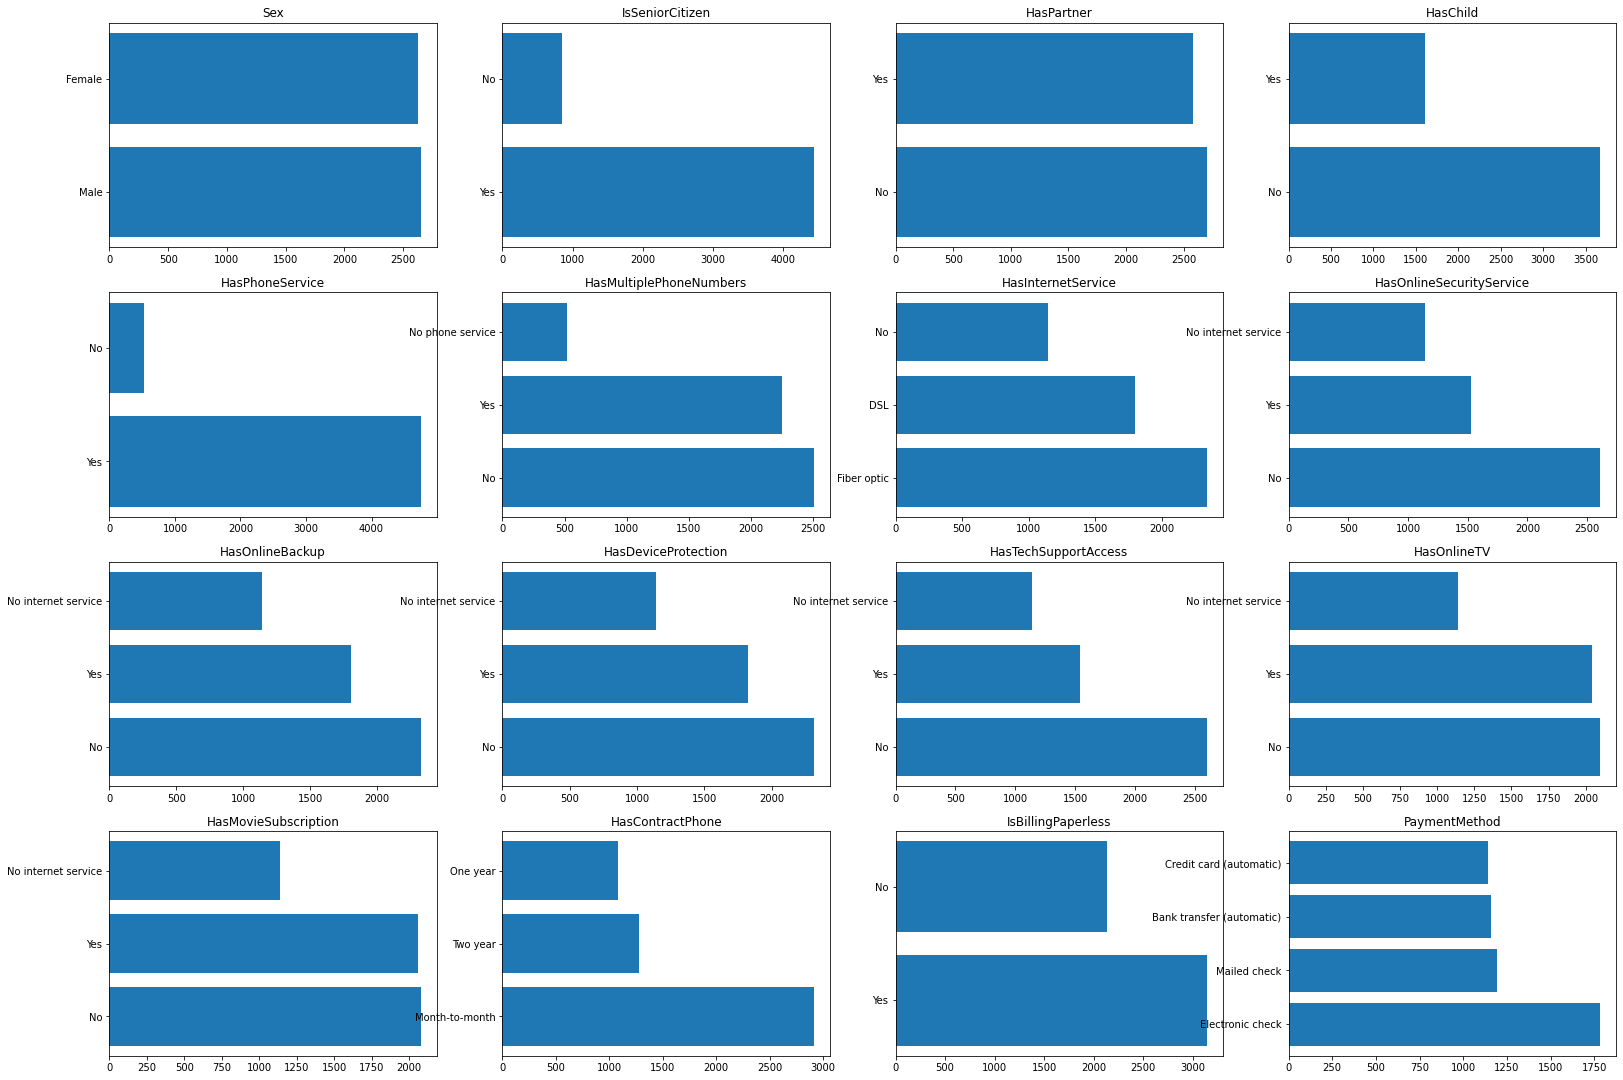

In [130]:
fig = plt.figure(figsize=(27, 19))

for i, col in zip(np.arange(len(cat_cols))+1, cat_cols):
    ser = data[col].value_counts()

    plt.subplot(4, 4, i)
    plt.title(col)
    plt.barh(ser.index, ser.values)

([<matplotlib.patches.Wedge at 0x7fde1943cbd0>,
 [Text(-0.7478930722742168, 0.8066324766857789, 'Churn = 0'),
  Text(0.8158833515718726, -0.8799627018390315, 'Churn = 1')],
 [Text(-0.4079416757859364, 0.4399813509195157, '73.80%'),
  Text(0.4759319550835924, -0.5133115760727683, '26.20%')])

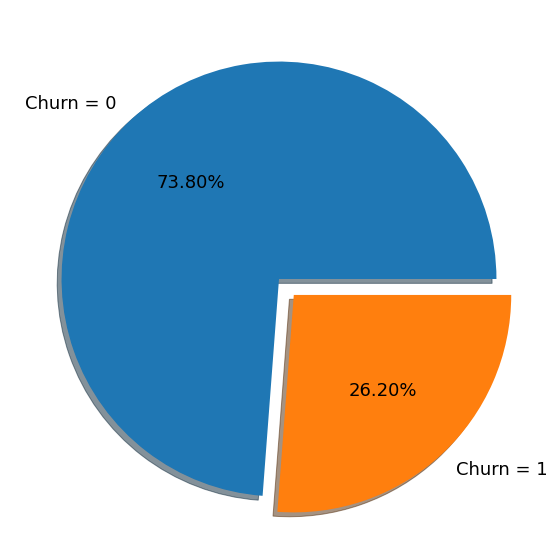

In [24]:
y = data.iloc[:, -1].value_counts().values
labels = ['Churn = 0', 'Churn = 1']
plt.figure(figsize=(10, 10))
plt.pie(y, labels=labels, explode=[0.0, 0.1], autopct='%.2f%%', shadow=True, textprops={'fontsize': 18})

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [25]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [26]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

## One-hot кодирование

In [27]:
# YOUR CODE
numeric_data = data[num_cols]
categorial_data = data[cat_cols]
categorial_data.head()

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,Yes,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,Yes,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,Yes,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,No,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,Yes,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [28]:
dummy_features = pd.get_dummies(categorial_data) #получаем таблицу one-hot категориальных признаков

In [29]:
X = pd.concat([numeric_data, dummy_features], axis=1) #складвыаем числовые фичи и one-hot
X_origin = data.iloc[:, :-1]
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,IsSeniorCitizen_No,IsSeniorCitizen_Yes,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55.0,19.50,1026.35,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,72.0,25.85,1872.20,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,1.0,75.90,75.90,0,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,32.0,79.30,2570.00,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,60.0,115.25,6758.45,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0


In [30]:
y = data['Churn']

In [31]:
X.shape, X_origin.shape

((5282, 46), (5282, 19))

## Разделение выборки обучающей выборки

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,
                                                    train_size=0.8,
                                                    random_state=17)

## Нормировка признаков

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение

## **KNN**

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
clf = KNeighborsClassifier()
clf.fit(X_train_scaled, y_train)
y_pred_proba = clf.predict_proba(X_test_scaled) #столбец из вероятностей принадлеж. : 0 и 1 соотв.
y_pred = clf.predict(X_test_scaled)

print(roc_auc_score(y_test, y_pred_proba[:, 1]))

0.7734594452247191


In [37]:
from sklearn.model_selection import cross_val_predict
from tqdm.notebook import tqdm

In [38]:
mas = []
max_n = 100
for i in tqdm(range(1, max_n)):
    clf = KNeighborsClassifier(n_neighbors=i)
    y_pred_prob = cross_val_predict(clf, X_train_scaled, y_train, cv=5, method='predict_proba')[:, 1]

    mas.append(roc_auc_score(y_train, y_pred_prob))

  0%|          | 0/99 [00:00<?, ?it/s]

49
0.8239367999688556


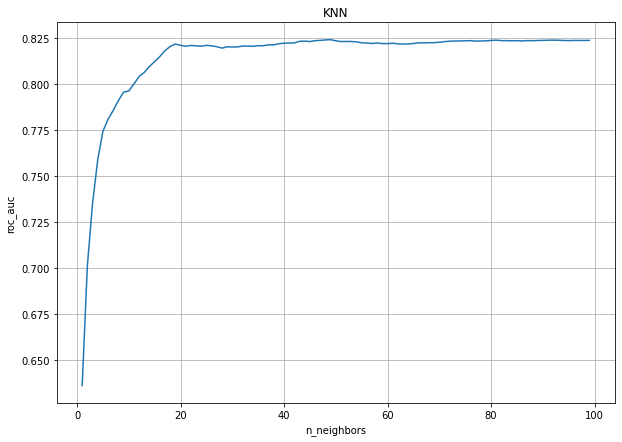

In [39]:
mas = np.array(mas)
x = np.arange(1, max_n, dtype = int)
plt.figure(figsize=(10, 7))
plt.xlabel('n_neighbors')
plt.ylabel('roc_auc')
plt.title('KNN')
plt.grid(True)
plt.plot(x, mas) #видно что оптимальное кол-во соседей между 
print(mas.argmax()+1)
print(mas.max())
None

In [40]:
from sklearn.metrics import make_scorer

params = {
    'n_neighbors' : np.arange(45, 55, 1),
    'metric' : np.array(['euclidean', 'manhattan']),
    'weights' : np.array(['uniform', 'distance'])
    }

clf_grid = GridSearchCV(clf, params, cv=5, scoring='roc_auc', n_jobs=-1, refit=True)

clf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=99, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': array(['euclidean', 'manhattan'], dtype='<U9'),
                         'n_neighbors': array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54]),
                         'weights': array(['uniform', 'distance'], dtype='<U8')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [41]:
print(clf_grid.best_params_)
print(clf_grid.best_score_)
print(clf_grid.best_estimator_)

{'metric': 'manhattan', 'n_neighbors': 46, 'weights': 'distance'}
0.7928895840286243
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=46, p=2,
                     weights='distance')


In [42]:
y_pred_prob = cross_val_predict(clf_grid, X_train_scaled, y_train, cv=5, method='predict_proba')[:, 1]

In [43]:
print(roc_auc_score(y_train, y_pred_prob))

0.8252156342101828


### **Linear Regression**

In [44]:
clf = LogisticRegressionCV(Cs=[100, 18, 10, 1, 0.1, 0.01, 0.001], scoring = 'roc_auc', penalty='l2', cv=5, random_state=0).fit(X_train, y_train)

In [45]:
print("Regularization parameter:")
print(clf.C_)
print("Bias:")
print(*clf.intercept_)
print("Coefs")
print(*clf.coef_)

idxs = np.arange(len(clf.coef_[0]))
coefs = clf.coef_[0]
idxs = sorted(idxs, key = lambda x: coefs[x])
neg = idxs[:5]
pos = idxs[-5::]
less = sorted(np.absolute(idxs))[:5]

Regularization parameter:
[0.1]
Bias:
-0.1243433229341948
Coefs
[-6.01378098e-02  2.36383355e-03  3.10558981e-04 -5.48253166e-02
 -6.84457932e-02  6.34876723e-02 -1.86758782e-01 -6.01547327e-02
 -6.31163771e-02  5.63105591e-03 -1.28902166e-01  4.63888122e-02
 -1.69659922e-01 -2.53174182e-01  4.63888122e-02  8.35142599e-02
 -2.67402701e-01  2.56058670e-01 -1.11927078e-01  2.74153619e-01
 -1.11927078e-01 -2.85497651e-01  1.38590926e-01 -1.11927078e-01
 -1.49934957e-01 -3.25737313e-02 -1.11927078e-01  2.12296999e-02
  2.04320360e-01 -1.11927078e-01 -2.15664392e-01 -5.60673668e-02
 -1.11927078e-01  4.47233354e-02 -5.26329421e-02 -1.11927078e-01
  4.12889106e-02  4.61949315e-01 -1.57205421e-01 -4.28015004e-01
 -3.07496682e-01  1.84225572e-01 -8.82455135e-02 -2.01809227e-01
  2.49237066e-01 -8.24534347e-02]


In [46]:
print("TOP five negative affect\n") #5 признаков, которые больше всего способствую тому, что пользователь не уйдет

for i in neg:
    print(f"{X.columns[i]} : {coefs[i]}")

TOP five negative affect

HasContractPhone_Two year : -0.42801500387914315
IsBillingPaperless_No : -0.3074966818253532
HasOnlineSecurityService_Yes : -0.2854976507465592
HasInternetService_DSL : -0.2674027011317757
HasMultiplePhoneNumbers_No : -0.2531741818541943


In [ ]:
print("TOP five positive affect\n") #5 признаков больше всего способствующих уходу пользователя

for i in pos:
    print(f"{X.columns[i]} : {coefs[i]}")

TOP five positive affect

HasTechSupportAccess_No : 0.20432036016624708
PaymentMethod_Electronic check : 0.2492370658448302
HasInternetService_Fiber optic : 0.25605866963947754
HasOnlineSecurityService_No : 0.2741536194280181
HasContractPhone_Month-to-month : 0.4619493145712371


In [47]:
print("TOP five less affect\n") #самые менее значительные признаки

for i in less:
    print(f"{X.columns[i]} : {coefs[i]}")

TOP five less affect

ClientPeriod : -0.06013780975199931
MonthlySpending : 0.0023638335496501987
TotalSpent : 0.00031055898114181905
Sex_Female : -0.05482531658978946
Sex_Male : -0.06844579315097017


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [48]:
y_pred_prob = cross_val_predict(clf, X_train_scaled, y_train, cv=5, method='predict_proba')[:, 1]

In [49]:
print(roc_auc_score(y_train, y_pred_prob))

0.8421685250196369


### **DecisionTreeClassifier**

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
clf = DecisionTreeClassifier()
params = {
    'max_depth' : [1, 5, 10, 15, 50],
    'max_features' : [10, 20, 40],          #всего 46
    'min_samples_leaf' : [5, 10, 30, 50, 100, 120, 140]
    }
clf_grid = GridSearchCV(clf, params, cv=5, scoring='roc_auc', n_jobs=-1, refit=True)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 15, 50],
                      

In [52]:
print(clf_grid.best_params_)
print(clf_grid.best_score_)
print(clf_grid.best_estimator_)

{'max_depth': 5, 'max_features': 40, 'min_samples_leaf': 140}
0.8303908807041973
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=40, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=140, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [53]:
y_pred_prob = cross_val_predict(clf_grid, X_train_scaled, y_train, cv=5, method='predict_proba')[:, 1]

In [54]:
print(roc_auc_score(y_train, y_pred_prob))

0.8275037957117046


### **Посмотрим на лучший скор линейной модели**

In [55]:
XX_test = pd.read_csv("./test.csv")

In [56]:
scaler = StandardScaler()
XX_train = scaler.fit_transform(X)

In [57]:
clf = LogisticRegressionCV(Cs=[100, 18, 10, 1, 0.1, 0.01, 0.001], scoring = 'roc_auc', penalty='l2', cv=5, random_state=0).fit(XX_train, y)

In [58]:
y_pred_prob = clf.predict_proba(XX_train)[:, 1]
print(roc_auc_score(y, y_pred_prob))

0.8490493309152166


In [59]:
def transform(data):
    for elem in num_cols: #попробуем перевести числовые признаки в float
        try:
            data[elem] = data[elem].astype(float)
        except:
            pass
    bad_ind = []
    for i in range(data.shape[0]): #посмотрим какие строки не перевелись в float
        try:
            a = float(data.loc[i, 'TotalSpent'])
        except:
            bad_ind.append(i)
    data.at[bad_ind, 'TotalSpent'] = 0 #занулим чтобы перевести все в float
    data['TotalSpent'] = data['TotalSpent'].astype(float)
    data.loc[bad_ind, 'TotalSpent'] = data.loc[bad_ind, 'MonthlySpending'] / 2
            
    data['IsSeniorCitizen'] = data['IsSeniorCitizen'].astype(str) #категорилальный признак отображается как число
    data['IsSeniorCitizen'] = data['IsSeniorCitizen'].apply(lambda x: 'Yes' if x == '0' else 'No') #преобразование в Yes/No

    numeric_data = data[num_cols]
    categorial_data = data[cat_cols]
    dummy_features = pd.get_dummies(categorial_data) #получаем таблицу one-hot категориальных признаков
    X = pd.concat([numeric_data, dummy_features], axis=1) #складвыаем числовые фичи и one-hot
    return X
XX_test = transform(XX_test)

In [60]:
scaler = StandardScaler()
XX_test = scaler.fit_transform(XX_test)

In [61]:
y_pred_prob = clf.predict_proba(XX_test)[:, 1]

(1761,)


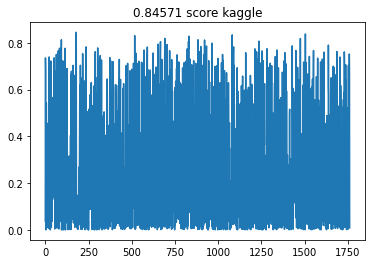

In [64]:
print(y_pred_prob.shape)
x = np.arange(y_pred_prob.shape[0])
plt.plot(x, y_pred_prob)
plt.title("0.84571 score kaggle");

In [ ]:
submission = pd.read_csv('./submission.csv')

submission['Churn'] = y_pred_prob
submission.to_csv('my_submission.csv')

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [65]:
# YOUR CODE
!pip install catboost
import catboost

     |████████████████████████████████| 76.4 MB 21 kB/s 


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [73]:
X_origin.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55.0,19.50,1026.35,Male,Yes,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72.0,25.85,1872.20,Male,Yes,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1.0,75.90,75.90,Male,Yes,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32.0,79.30,2570.00,Female,No,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60.0,115.25,6758.45,Female,Yes,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [74]:
X_train_origin, X_test_origin, y_train_origin, y_test_origin = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [75]:
cat_idxs = []
for i, elem in enumerate(X_origin.columns):
    if elem in cat_cols:
        cat_idxs.append(i)
print(cat_idxs)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [77]:
X_origin.dtypes

ClientPeriod                float64
MonthlySpending             float64
TotalSpent                  float64
Sex                          object
IsSeniorCitizen              object
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
dtype: object

In [106]:
boosting_model = catboost.CatBoostClassifier(cat_features=cat_idxs, eval_metric='AUC')

boosting_model.fit(X_train_origin, y_train_origin)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

Learning rate set to 0.019062
0:	total: 15.3ms	remaining: 15.3s
1:	total: 27.9ms	remaining: 13.9s
2:	total: 40.7ms	remaining: 13.5s
3:	total: 53ms	remaining: 13.2s
4:	total: 66.8ms	remaining: 13.3s
5:	total: 80.9ms	remaining: 13.4s
6:	total: 91.6ms	remaining: 13s
7:	total: 98.2ms	remaining: 12.2s
8:	total: 111ms	remaining: 12.3s
9:	total: 126ms	remaining: 12.5s
10:	total: 139ms	remaining: 12.5s
11:	total: 154ms	remaining: 12.7s
12:	total: 165ms	remaining: 12.5s
13:	total: 180ms	remaining: 12.6s
14:	total: 195ms	remaining: 12.8s
15:	total: 214ms	remaining: 13.2s
16:	total: 228ms	remaining: 13.2s
17:	total: 243ms	remaining: 13.2s
18:	total: 257ms	remaining: 13.3s
19:	total: 268ms	remaining: 13.1s
20:	total: 283ms	remaining: 13.2s
21:	total: 298ms	remaining: 13.2s
22:	total: 310ms	remaining: 13.2s
23:	total: 322ms	remaining: 13.1s
24:	total: 335ms	remaining: 13.1s
25:	total: 348ms	remaining: 13s
26:	total: 363ms	remaining: 13.1s
27:	total: 376ms	remaining: 13.1s
28:	total: 384ms	remaining

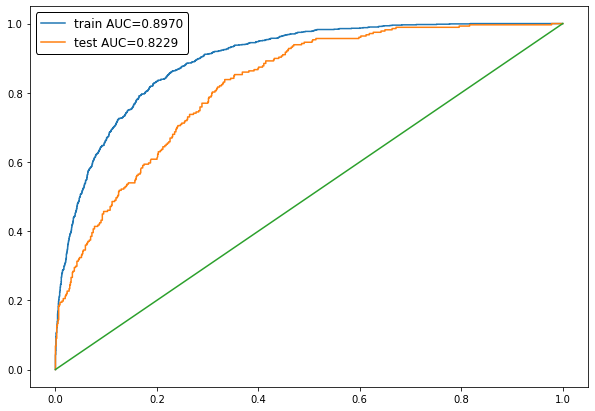

In [107]:
from sklearn.metrics import roc_curve
train_auc = roc_auc_score(y_train_origin, y_train_predicted)
test_auc = roc_auc_score(y_test_origin, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train_origin, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test_origin, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [108]:
print(boosting_model.get_all_params())

{'nan_mode': 'Min', 'eval_metric': 'AUC', 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'], 'iterations': 1000, 'sampling_frequency': 'PerTree', 'fold_permutation_block': 0, 'leaf_estimation_method': 'Newton', 'counter_calc_method': 'SkipTest', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'ctr_leaf_count_limit': 18446744073709551615, 'bayesian_matrix_reg': 0.10000000149011612, 'one_hot_max_size': 2, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'max_ctr_complexity': 4, 'model_size_reg': 0.5, 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1', 'Counter:CtrBorderCount=15:CtrBorderType=Unifor

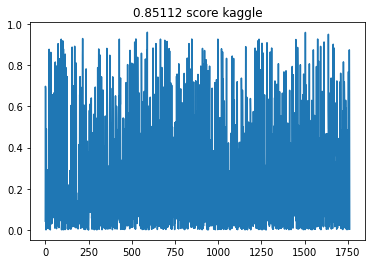

In [102]:
X_test = pd.read_csv("./test.csv")
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]
plt.title("0.85112 score kaggle")
plt.plot(np.arange(len(y_test_predicted)), y_test_predicted);

### **Тюнинг градиентного бустинга по основным параметрам**

In [92]:
submission = pd.read_csv('./submission.csv')

submission['Churn'] = y_test_predicted
submission.to_csv('my_submission.csv', index=False)

In [110]:
boosting_model = catboost.CatBoostClassifier(cat_features=cat_idxs)
boosting_model.grid_search({'n_estimators': [200, 600, 1000],
                            'learning_rate' : [0.05, 0.01, 0.02, 0.03],
                            'depth' : [3, 6, 9]}, 
                           X_train_origin, 
                           y_train_origin, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
836:	learn: 0.0897676	test: 0.4932381	best: 0.4287755 (46)	total: 33.6s	remaining: 6.54s
837:	learn: 0.0896488	test: 0.4932626	best: 0.4287755 (46)	total: 33.6s	remaining: 6.5s
838:	learn: 0.0895575	test: 0.4934245	best: 0.4287755 (46)	total: 33.6s	remaining: 6.46s
839:	learn: 0.0893806	test: 0.4935015	best: 0.4287755 (46)	total: 33.7s	remaining: 6.42s
840:	learn: 0.0892521	test: 0.4936530	best: 0.4287755 (46)	total: 33.7s	remaining: 6.38s
841:	learn: 0.0891542	test: 0.4936419	best: 0.4287755 (46)	total: 33.8s	remaining: 6.34s
842:	learn: 0.0890456	test: 0.4936308	best: 0.4287755 (46)	total: 33.8s	remaining: 6.29s
843:	learn: 0.0889758	test: 0.4938654	best: 0.4287755 (46)	total: 33.8s	remaining: 6.26s
844:	learn: 0.0889016	test: 0.4939020	best: 0.4287755 (46)	total: 33.9s	remaining: 6.22s
845:	learn: 0.0888607	test: 0.4940873	best: 0.4287755 (46)	total: 33.9s	remaining: 6.18s
846:	learn: 0.0888373	test: 0.4941209	best:

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [121]:
boosting_model.fit(X_train_origin, y_train_origin)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

0:	learn: 0.6680013	total: 6.72ms	remaining: 4.03s
1:	learn: 0.6448831	total: 14.3ms	remaining: 4.28s
2:	learn: 0.6264306	total: 20.7ms	remaining: 4.12s
3:	learn: 0.6076903	total: 25.7ms	remaining: 3.83s
4:	learn: 0.5880917	total: 32.1ms	remaining: 3.82s
5:	learn: 0.5698943	total: 39.9ms	remaining: 3.95s
6:	learn: 0.5531958	total: 46.4ms	remaining: 3.93s
7:	learn: 0.5391016	total: 53.5ms	remaining: 3.96s
8:	learn: 0.5264068	total: 60ms	remaining: 3.94s
9:	learn: 0.5150651	total: 65.3ms	remaining: 3.85s
10:	learn: 0.5069140	total: 71.7ms	remaining: 3.84s
11:	learn: 0.4980222	total: 77.5ms	remaining: 3.8s
12:	learn: 0.4905116	total: 83.2ms	remaining: 3.76s
13:	learn: 0.4848430	total: 89.5ms	remaining: 3.75s
14:	learn: 0.4801031	total: 95.8ms	remaining: 3.73s
15:	learn: 0.4756760	total: 101ms	remaining: 3.69s
16:	learn: 0.4704464	total: 108ms	remaining: 3.71s
17:	learn: 0.4662039	total: 117ms	remaining: 3.79s
18:	learn: 0.4614465	total: 123ms	remaining: 3.77s
19:	learn: 0.4577028	total: 1

In [122]:

print(X_test_origin.shape)
print(y_test_origin.shape)
print(y_test_predicted.shape)

(1057, 19)
(1057,)
(1057,)


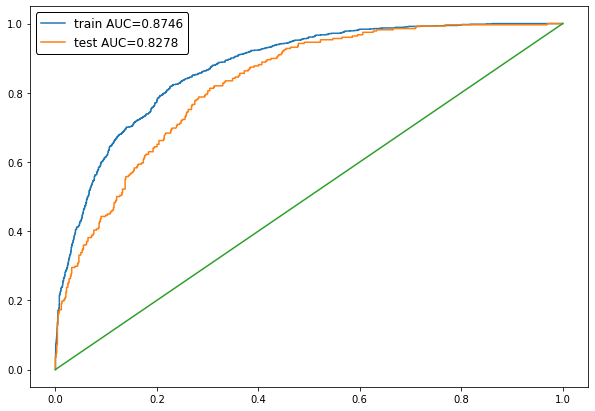

In [123]:
train_auc = roc_auc_score(y_train_origin, y_train_predicted)
test_auc = roc_auc_score(y_test_origin, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train_origin, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test_origin, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

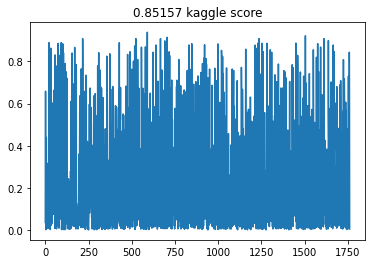

In [127]:
X_test = pd.read_csv("./test.csv")
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]
plt.title('0.85157 kaggle score')
plt.plot(np.arange(len(y_test_predicted)), y_test_predicted);

In [126]:
submission = pd.read_csv('./submission.csv')

submission['Churn'] = y_test_predicted
submission.to_csv('my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.